In [1]:
import datetime as dt
import numpy as np
import pandas_datareader.data as web
import yfinance as yf
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.stats import skew

yf.pdr_override()

## Step 4 Getting Data

In [2]:
start = dt.date(2014,12,26)
end = dt.date(2023,12,26)

df = web.DataReader(["^GSPC","TSLA","^VIX"],start,end)["Adj Close"]

[*********************100%%**********************]  3 of 3 completed


In [3]:
df.rename(columns={"TSLA": "Tesla","^GSPC":"SnP500","^VIX":"VIX"}, inplace=True)

In [4]:
df

,Tesla,SnP500,VIX
Date,,,
2014-12-26,15.188000,2088.770020,14.500000
2014-12-29,15.047333,2090.570068,15.060000
2014-12-30,14.815333,2080.350098,15.920000
2014-12-31,14.827333,2058.899902,19.200001
2015-01-02,14.620667,2058.199951,17.790001
...,...,...,...
2023-12-18,252.080002,4740.560059,12.560000
2023-12-19,257.220001,4768.370117,12.530000
2023-12-20,247.139999,4698.350098,13.670000


## Step - 5. Exploratory Data Analysis 

In [5]:
df.describe()

,Tesla,SnP500,VIX
count,2264.000000,2264.000000,2264.000000
mean,102.462291,3120.717438,18.571277
std,110.812759,869.700662,7.534202
min,9.578000,1829.079956,9.140000
25%,16.653500,2362.322449,13.390000
50%,23.147333,2887.295044,16.730000
75%,213.450836,3970.067505,21.840000
max,409.970001,4796.560059,82.690002


<AxesSubplot:xlabel='Date'>

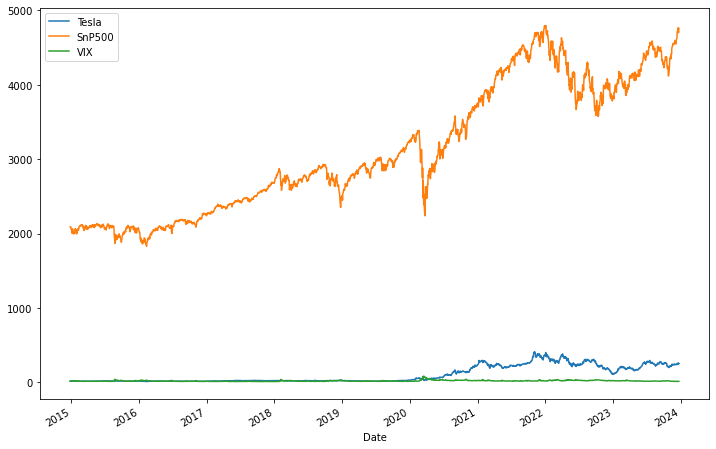

In [6]:
df.plot(figsize=(12, 8))

### S&P 500, Tesla Share Price, and VIX Data

The notable disparity in the price ranges of S&P 500, Tesla shares, and VIX levels renders this graph visually misleading due to inadequate data standardization.


In [7]:
df.isna().sum()

Tesla     0
SnP500    0
VIX       0
dtype: int64

In [8]:
df["Tesla"] = np.log(df.Tesla)-np.log(df.Tesla.shift(1))
df["SnP500"] = np.log(df.SnP500)-np.log(df.SnP500.shift(1))

In [9]:
df.head()

,Tesla,SnP500,VIX
Date,,,
2014-12-26,NaN,NaN,14.500000
2014-12-29,-0.009305,0.000861,15.060000
2014-12-30,-0.015538,-0.004901,15.920000
2014-12-31,0.000810,-0.010364,19.200001
2015-01-02,-0.014036,-0.000340,17.790001


In [10]:
df = df.iloc[1:]

In [11]:
df.head()

,Tesla,SnP500,VIX
Date,,,
2014-12-29,-0.009305,0.000861,15.060000
2014-12-30,-0.015538,-0.004901,15.920000
2014-12-31,0.000810,-0.010364,19.200001
2015-01-02,-0.014036,-0.000340,17.790001
2015-01-05,-0.042950,-0.018447,19.920000


(-0.3, 0.3)

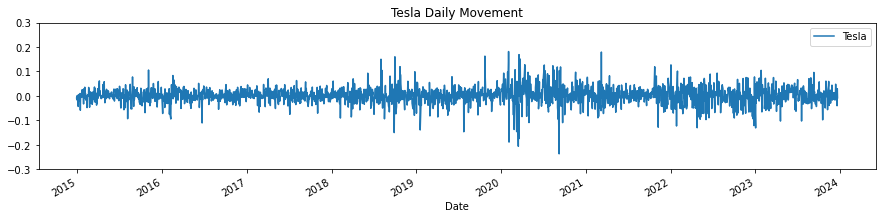

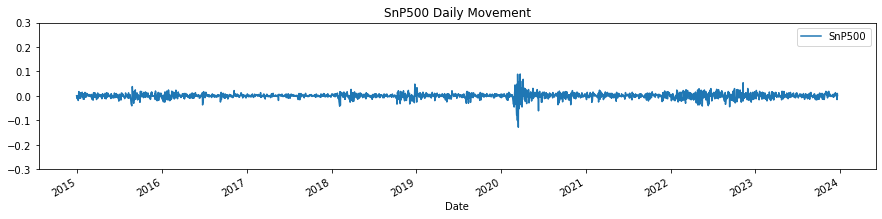

In [12]:
ax1 = df.plot(figsize=(15,3), y='Tesla',title = 'Tesla Daily Movement')
ax2 = df.plot(figsize=(15,3), y='SnP500',title = 'SnP500 Daily Movement')
ax1.set_ylim(-0.3,0.3)
ax2.set_ylim(-0.3,0.3)

### Tesla's Stock Exhibits Higher Volatility Compared to the S&P 500 Index in this Graph


# Comparison by VIX Ranges:
- **Low (0-15)**
- **Moderate (15-25)**
- **High (25-40)**
- **Extreme (40+)**


In [13]:
dates_vix_less_than_15 = df[df['VIX'] < 15]

In [14]:
dates_vix_less_than_15

,Tesla,SnP500,VIX
Date,,,
2015-02-13,0.004377,0.004066,14.69
2015-02-20,0.025187,0.006108,14.30
2015-02-23,-0.046044,-0.000303,14.56
2015-02-24,-0.015701,0.002755,13.69
2015-02-25,-0.001716,-0.000766,13.84
...,...,...,...
2023-12-18,-0.005617,0.004518,12.56
2023-12-19,0.020185,0.005849,12.53
2023-12-20,-0.039977,-0.014793,13.67


(-0.15, 0.15)

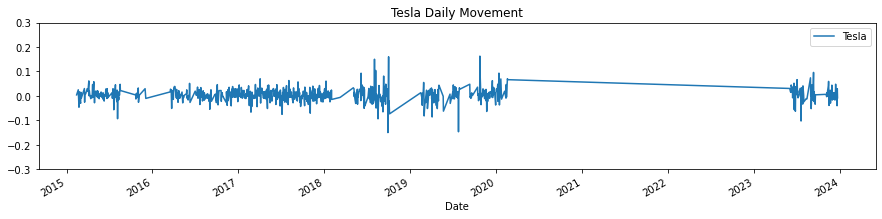

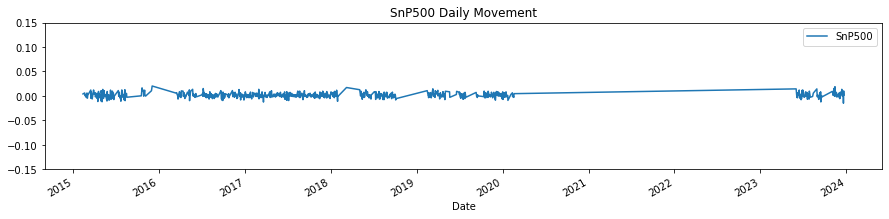

In [15]:
ax1 = dates_vix_less_than_15.plot(figsize=(15,3), y='Tesla',title = 'Tesla Daily Movement')
ax2 = dates_vix_less_than_15.plot(figsize=(15,3), y='SnP500',title = 'SnP500 Daily Movement')
ax1.set_ylim(-0.30,0.30)
ax2.set_ylim(-0.15,0.15)

In [16]:
dates_vix_between_than_15_25 = df[(df['VIX'] >= 15) & (df['VIX'] < 25)]

In [17]:
dates_vix_between_than_15_25

,Tesla,SnP500,VIX
Date,,,
2014-12-29,-0.009305,0.000861,15.060000
2014-12-30,-0.015538,-0.004901,15.920000
2014-12-31,0.000810,-0.010364,19.200001
2015-01-02,-0.014036,-0.000340,17.790001
2015-01-05,-0.042950,-0.018447,19.920000
...,...,...,...
2023-10-30,-0.049138,0.011938,19.750000
2023-10-31,0.017479,0.006454,18.139999
2023-11-01,0.023716,0.010451,16.870001


(-0.15, 0.15)

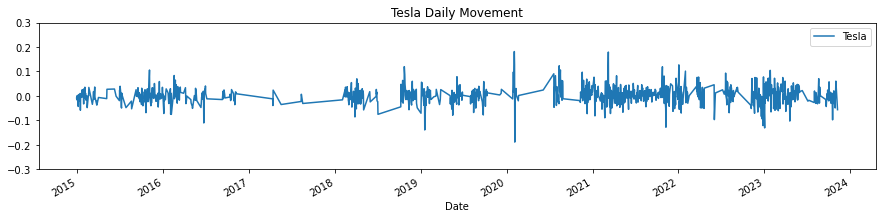

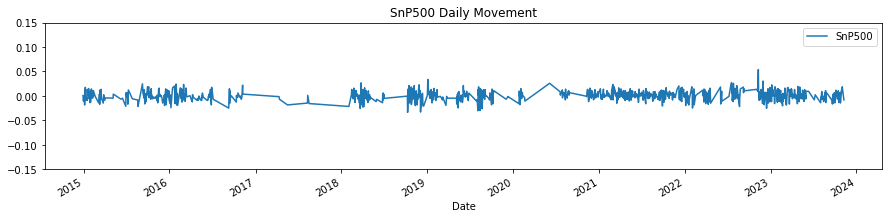

In [18]:
ax3 = dates_vix_between_than_15_25.plot(figsize=(15,3), y='Tesla',title = 'Tesla Daily Movement')
ax4 = dates_vix_between_than_15_25.plot(figsize=(15,3), y='SnP500',title = 'SnP500 Daily Movement')
ax3.set_ylim(-0.30,0.30)
ax4.set_ylim(-0.15,0.15)

(-0.15, 0.15)

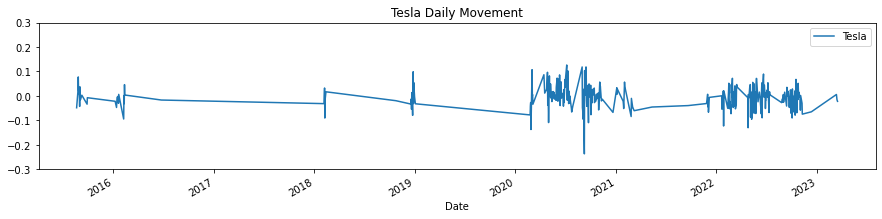

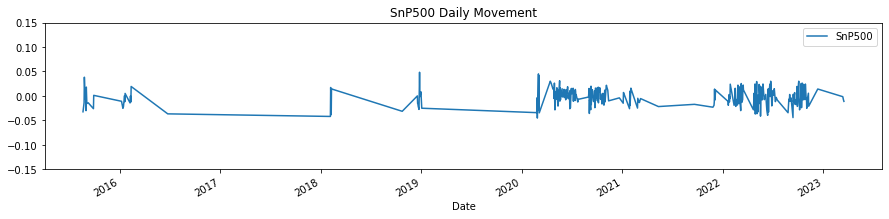

In [19]:
dates_vix_between_than_25_40 = df[(df['VIX'] >= 25) & (df['VIX'] < 40)]
ax5 = dates_vix_between_than_25_40.plot(figsize=(15,3), y='Tesla',title = 'Tesla Daily Movement')
ax6 = dates_vix_between_than_25_40.plot(figsize=(15,3), y='SnP500',title = 'SnP500 Daily Movement')
ax5.set_ylim(-0.30,0.30)
ax6.set_ylim(-0.15,0.15)

(-0.15, 0.15)

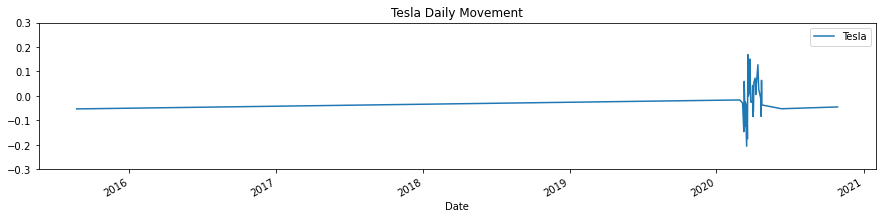

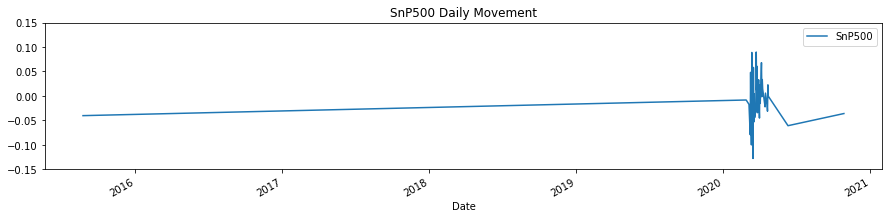

In [20]:
dates_vix_greater_than_40 = df[(df['VIX'] >= 40) ]
ax7 = dates_vix_greater_than_40.plot(figsize=(15,3), y='Tesla',title = 'Tesla Daily Movement')
ax8 = dates_vix_greater_than_40.plot(figsize=(15,3), y='SnP500',title = 'SnP500 Daily Movement')
ax7.set_ylim(-0.30,0.30)
ax8.set_ylim(-0.15,0.15)

In [21]:
ax1.set_ylim(-0.30,0.30)
ax3.set_ylim(-0.30,0.30)
ax5.set_ylim(-0.30,0.30)
ax7.set_ylim(-0.30,0.30)

(-0.3, 0.3)

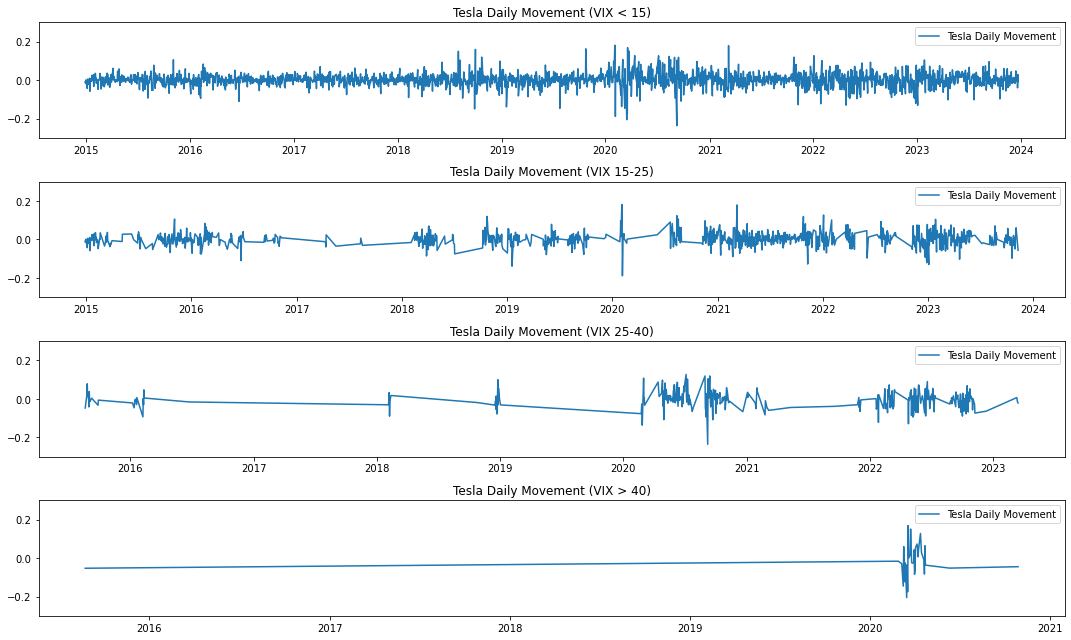

In [22]:
fig, (ax1_combined, ax3_combined, ax5_combined, ax7_combined) = plt.subplots(4, figsize=(15, 9))

ax1_combined.plot(df['Tesla'], label='Tesla Daily Movement')
ax3_combined.plot(dates_vix_between_than_15_25['Tesla'], label='Tesla Daily Movement')
ax5_combined.plot(dates_vix_between_than_25_40['Tesla'], label='Tesla Daily Movement')
ax7_combined.plot(dates_vix_greater_than_40['Tesla'], label='Tesla Daily Movement')

ax1_combined.set_title('Tesla Daily Movement (VIX < 15)')
ax3_combined.set_title('Tesla Daily Movement (VIX 15-25)')
ax5_combined.set_title('Tesla Daily Movement (VIX 25-40)')
ax7_combined.set_title('Tesla Daily Movement (VIX > 40)')

ax1_combined.set_ylim(-0.30, 0.30)
ax3_combined.set_ylim(-0.30, 0.30)
ax5_combined.set_ylim(-0.30, 0.30)
ax7_combined.set_ylim(-0.30, 0.30)

ax1_combined.legend()
ax3_combined.legend()
ax5_combined.legend()
ax7_combined.legend()

plt.tight_layout()
plt.show()


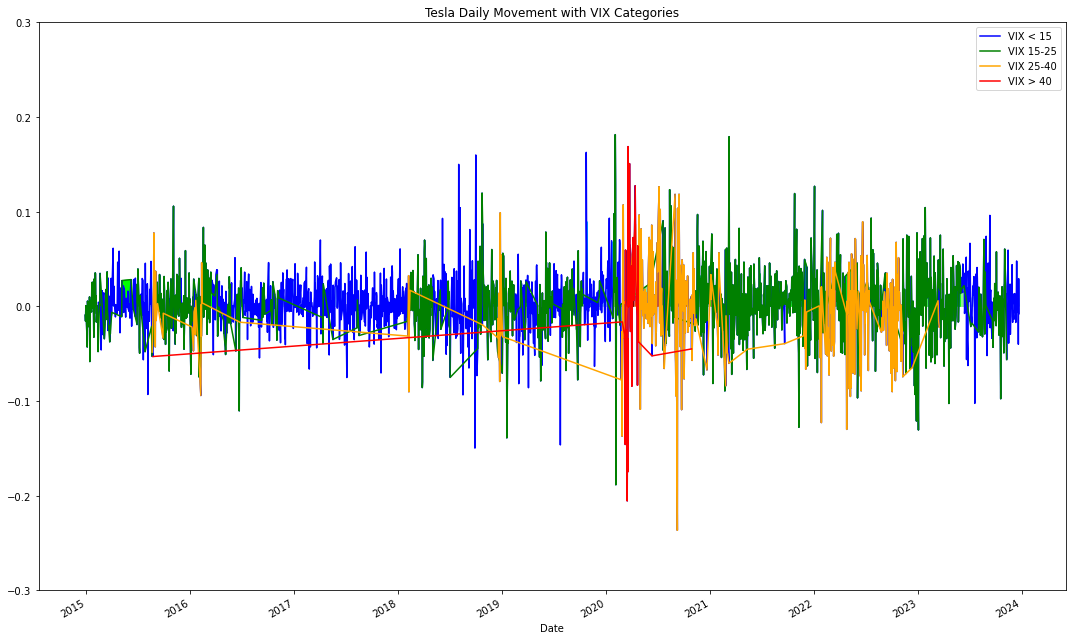

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))

df['Tesla'].plot(ax=ax, label='VIX < 15', color='blue')
dates_vix_between_than_15_25['Tesla'].plot(ax=ax, label='VIX 15-25', color='green')
dates_vix_between_than_25_40['Tesla'].plot(ax=ax, label='VIX 25-40', color='orange')
dates_vix_greater_than_40['Tesla'].plot(ax=ax, label='VIX > 40', color='red')

ax.fill_between(df.index, df['Tesla'], where=(df['Tesla'] >= 0) & (df['Tesla'] <= 0.025), color='lightblue')
ax.fill_between(df.index, df['Tesla'], where=(df['Tesla'] > 0.025) & (df['Tesla'] <= 0.05), color='skyblue')
ax.fill_between(df.index, df['Tesla'], where=(df['Tesla'] > 0.05) & (df['Tesla'] <= 0.1), color='deepskyblue')

ax.fill_between(dates_vix_between_than_15_25.index, dates_vix_between_than_15_25['Tesla'], where=(dates_vix_between_than_15_25['Tesla'] >= 0) & (dates_vix_between_than_15_25['Tesla'] <= 0.025), color='lightgreen')
ax.fill_between(dates_vix_between_than_15_25.index, dates_vix_between_than_15_25['Tesla'], where=(dates_vix_between_than_15_25['Tesla'] > 0.025) & (dates_vix_between_than_15_25['Tesla'] <= 0.05), color='lime')
ax.fill_between(dates_vix_between_than_15_25.index, dates_vix_between_than_15_25['Tesla'], where=(dates_vix_between_than_15_25['Tesla'] > 0.05) & (dates_vix_between_than_15_25['Tesla'] <= 0.1), color='greenyellow')

ax.fill_between(dates_vix_between_than_25_40.index, dates_vix_between_than_25_40['Tesla'], where=(dates_vix_between_than_25_40['Tesla'] >= 0) & (dates_vix_between_than_25_40['Tesla'] <= 0.025), color='orange')
ax.fill_between(dates_vix_between_than_25_40.index, dates_vix_between_than_25_40['Tesla'], where=(dates_vix_between_than_25_40['Tesla'] > 0.025) & (dates_vix_between_than_25_40['Tesla'] <= 0.05), color='darkorange')
ax.fill_between(dates_vix_between_than_25_40.index, dates_vix_between_than_25_40['Tesla'], where=(dates_vix_between_than_25_40['Tesla'] > 0.05) & (dates_vix_between_than_25_40['Tesla'] <= 0.1), color='orangered')

ax.fill_between(dates_vix_greater_than_40.index, dates_vix_greater_than_40['Tesla'], where=(dates_vix_greater_than_40['Tesla'] >= 0) & (dates_vix_greater_than_40['Tesla'] <= 0.025), color='lightcoral')
ax.fill_between(dates_vix_greater_than_40.index, dates_vix_greater_than_40['Tesla'], where=(dates_vix_greater_than_40['Tesla'] > 0.025) & (dates_vix_greater_than_40['Tesla'] <= 0.05), color='indianred')
ax.fill_between(dates_vix_greater_than_40.index, dates_vix_greater_than_40['Tesla'], where=(dates_vix_greater_than_40['Tesla'] > 0.05) & (dates_vix_greater_than_40['Tesla'] <= 0.1), color='darkred')

ax.set_ylim(-0.30, 0.30)

ax.set_title('Tesla Daily Movement with VIX Categories')

ax.legend()

plt.tight_layout()
plt.show()


### **Possible reasons for Limited Differentiation in Tesla's Daily Changes Compared to VIX Ranges**

1. **Market Independence:** Tesla's stock might not be significantly affected by overall market volatility measured by the VIX. Some stocks or sectors exhibit independence from broader market movements due to unique business models, market positioning, or investor sentiment specific to the company.

2. **Tesla-Specific Factors:** Internal news, product launches, CEO statements, or financial reports might overshadow the impact of general market volatility on Tesla's stock. Factors such as production updates, innovation announcements, or regulatory decisions could drive Tesla's stock more than overall market sentiment.

3. **Volatility Calibration:** While the VIX is a widely used measure, its correlation with individual stocks can vary. Some stocks might not closely align with VIX movements due to differences in volatility patterns or industry-specific dynamics.

4. **Investor Sentiment:** Tesla has a distinct investor base known for its long-term commitment and differing perspectives from broader market sentiment. This unique investor behavior might reduce the immediate impact of VIX changes on Tesla's stock price.

5. **Timeframes and Data Analysis:** Daily changes may not capture the full extent of VIX influence on Tesla's stock. Examining different timeframes (weekly, monthly) or using statistical analysis like correlation coefficients or regression models could offer deeper insights into the relationship between Tesla's daily changes and VIX.


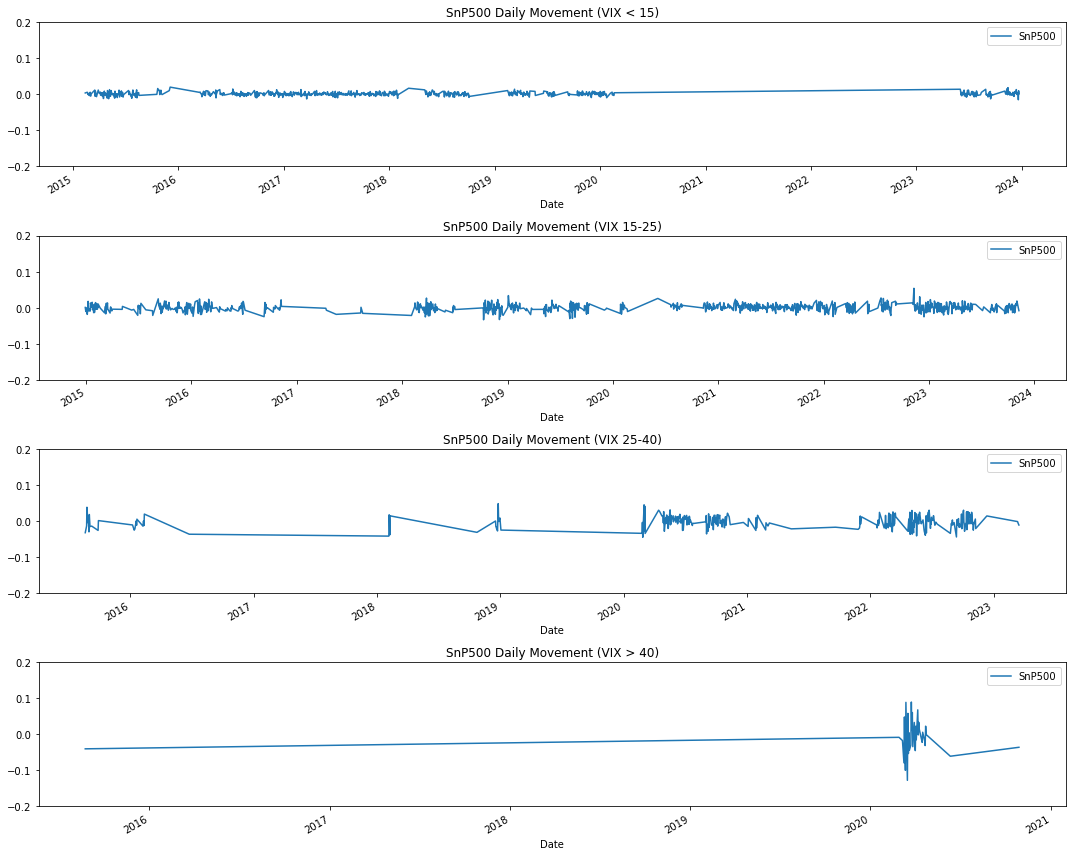

In [24]:
fig, ((ax2_combined), (ax4_combined), (ax6_combined), (ax8_combined)) = plt.subplots(4, figsize=(15, 12))

dates_vix_less_than_15.plot(y='SnP500', title='SnP500 Daily Movement (VIX < 15)', ax=ax2_combined)
dates_vix_between_than_15_25.plot(y='SnP500', title='SnP500 Daily Movement (VIX 15-25)', ax=ax4_combined)
dates_vix_between_than_25_40.plot(y='SnP500', title='SnP500 Daily Movement (VIX 25-40)', ax=ax6_combined)
dates_vix_greater_than_40.plot(y='SnP500', title='SnP500 Daily Movement (VIX > 40)', ax=ax8_combined)

ax2_combined.set_ylim(-0.2, 0.2)
ax4_combined.set_ylim(-0.2, 0.2)
ax6_combined.set_ylim(-0.2, 0.2)
ax8_combined.set_ylim(-0.2, 0.2)

plt.tight_layout()

plt.show()


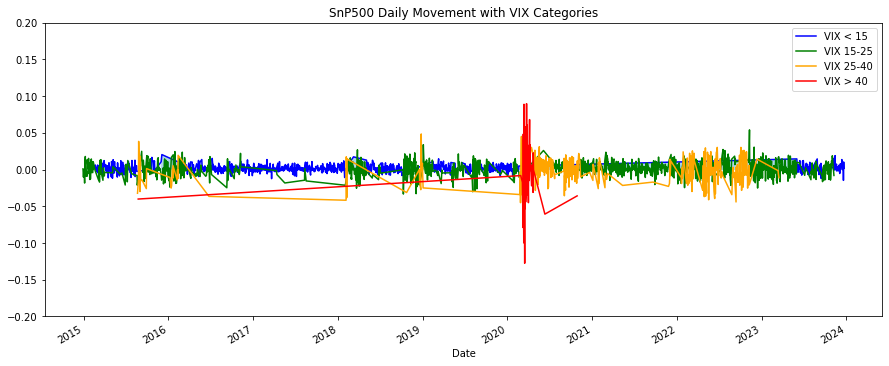

In [25]:
plt.figure(figsize=(15, 6))


dates_vix_less_than_15['SnP500'].plot(label='VIX < 15', color='blue')
dates_vix_between_than_15_25['SnP500'].plot(label='VIX 15-25', color='green')
dates_vix_between_than_25_40['SnP500'].plot(label='VIX 25-40', color='orange')
dates_vix_greater_than_40['SnP500'].plot(label='VIX > 40', color='red')


plt.ylim(-0.2, 0.2)

plt.fill_between(dates_vix_less_than_15.index, dates_vix_less_than_15['SnP500'], where=(dates_vix_less_than_15['SnP500'] >= 0) & (dates_vix_less_than_15['SnP500'] <= 0.025), color='lightblue')
plt.fill_between(dates_vix_less_than_15.index, dates_vix_less_than_15['SnP500'], where=(dates_vix_less_than_15['SnP500'] > 0.025) & (dates_vix_less_than_15['SnP500'] <= 0.05), color='skyblue')
plt.fill_between(dates_vix_less_than_15.index, dates_vix_less_than_15['SnP500'], where=(dates_vix_less_than_15['SnP500'] > 0.05) & (dates_vix_less_than_15['SnP500'] <= 0.1), color='deepskyblue')

plt.legend()

plt.title('SnP500 Daily Movement with VIX Categories')
plt.show()


### **Volatility Analysis based on VIX**

The graph showcases the correlation between market fluctuations and the VIX (Volatility Index). The distinct colors denote various levels of volatility, allowing for a clear interpretation:

- **Low Volatility (VIX < 15 - Blue):** During these periods, characterized by a VIX below 15, the market tends to exhibit a stable and relatively calm demeanor. Investors often witness consistent and incremental movements with limited upheavals. This tranquility might suggest a sense of confidence and predictability among market participants.

- **Moderate Volatility (VIX 15-25 - Green):** The green segments on the graph, with a VIX range between 15 and 25, signify a moderate level of market fluctuations. This range typically indicates a slightly elevated but manageable level of uncertainty. Investors might experience periodic fluctuations without significant disruptions, fostering an environment where caution is advised but not alarmingly so.

- **Higher Volatility (VIX 25-40 - Yellow):** When the VIX escalates to the range of 25 to 40, denoted by the yellow sections, the market undergoes higher levels of turbulence. Investors should brace for increased fluctuations and heightened nervousness within this range. The market sentiment might become more reactive to news and events, potentially causing more pronounced shifts in asset prices.

- **Extreme Volatility (VIX > 40 - Red):** The red segments, where the VIX exceeds 40, represent extreme volatility. During these phases, the market experiences heightened chaos and unpredictability. Investors often encounter rapid and substantial price swings, prompting a surge in anxiety and uncertainty. This level of volatility may be indicative of significant market stress and potential financial instability.

Understanding these VIX-based volatility ranges assists investors and analysts in gauging the market's temperament, enabling more informed decision-making and risk management strategies.


# Kurtosis & VIX

In [27]:
dates_vix_less_than_15['SnP500'].kurt()

0.5883827358149105

In [28]:
dates_vix_between_than_15_25['SnP500'].kurt()

0.9963683031191648

In [29]:
dates_vix_between_than_25_40['SnP500'].kurt()

-0.14156815522020283

In [30]:
dates_vix_greater_than_40['SnP500'].kurt()

0.1723453161258739

In [31]:
from tabulate import tabulate

data = [
    ["VIX < 15", 0.5883827358149105],
    ["VIX 15-25", 0.9963683031191648],
    ["VIX 25-40", -0.14156815522020283],
    ["VIX > 40", 0.1723453161258739]
]

table = tabulate(data, headers=["VIX Range", "Kurtosis Value"], tablefmt="pretty")

print(table)


+-----------+----------------------+
| VIX Range |    Kurtosis Value    |
+-----------+----------------------+
| VIX < 15  |  0.5883827358149105  |
| VIX 15-25 |  0.9963683031191648  |
| VIX 25-40 | -0.14156815522020283 |
| VIX > 40  |  0.1723453161258739  |
+-----------+----------------------+


The kurtosis values indicate the degree of tailedness or the thickness of the tails in a distribution compared to a normal distribution.

### VIX < 15:
The kurtosis value of 0.588 suggests that during periods when the VIX is less than 15 (indicating relatively lower volatility in the market), the S&P 500's distribution has a slightly higher peak and moderate tails compared to a normal distribution. The positive value indicates slightly heavier tails than a normal distribution, suggesting a moderate level of outlier events during these periods.

### VIX 15-25:
As the VIX moves into the range of 15-25, the kurtosis value increases to 0.996. This suggests that during moderate volatility periods, the distribution of S&P 500 returns exhibits even higher peakedness and relatively heavier tails than both periods of low volatility and a normal distribution. This signifies an increased likelihood of extreme events or outliers in the market during moderate volatility phases.

### VIX 25-40:
When the VIX escalates further to the range of 25-40, the kurtosis value drops to -0.142. A negative kurtosis implies thinner or lighter tails compared to a normal distribution. This unusual change in kurtosis might indicate a different distribution shape during higher volatility periods, potentially suggesting a less peaked distribution or a flatter shape, but with relatively fewer outlier events compared to moderate volatility periods.

### VIX > 40:
Finally, when the VIX surpasses 40, the kurtosis value slightly rises to 0.172. This suggests a return to a distribution shape more similar to moderate volatility periods, with a slightly higher peakedness and moderate tails, though potentially with fewer extreme events compared to the moderate volatility range of 15-25.

These findings indicate how different volatility regimes, as measured by the VIX, can influence the shape and tails of the S&P 500 returns distribution. The variations in kurtosis across VIX ranges provide insights into the market behavior and the varying degrees of risk during different volatility environments.


# Skewness and VIX

In [32]:
skew_less_than_15 = skew(dates_vix_less_than_15['SnP500'])
skew_between_15_25 = skew(dates_vix_between_than_15_25['SnP500'])
skew_between_25_40 = skew(dates_vix_between_than_25_40['SnP500'])
skew_greater_than_40 = skew(dates_vix_greater_than_40['SnP500'])

# Organize data into a list of lists for tabulate
data = [
    ["VIX < 15", skew_less_than_15],
    ["VIX 15-25", skew_between_15_25],
    ["VIX 25-40", skew_between_25_40],
    ["VIX > 40", skew_greater_than_40]
]

# Create and print the table
table = tabulate(data, headers=["VIX Range", "Skewness Value"], tablefmt="pretty")
print(table)


+-----------+-----------------------+
| VIX Range |    Skewness Value     |
+-----------+-----------------------+
| VIX < 15  |  0.3009666840589444   |
| VIX 15-25 | 0.018221937972600712  |
| VIX 25-40 | -0.040123881659901495 |
| VIX > 40  | -0.032632723546510645 |
+-----------+-----------------------+


The table showcases the skewness values corresponding to various VIX ranges, offering insights into the shape and asymmetry of the distribution of S&P500 returns during different volatility regimes.

**VIX < 15:**
With a skewness value of approximately 0.301, this range signifies a slightly positive skewness. It suggests that during periods when the VIX is less than 15 (indicating lower volatility), the distribution of S&P500 returns tends to have a slight right-tail skew. This indicates a tendency for more frequent smaller positive returns compared to negative returns.

**VIX 15-25:**
The skewness value of approximately 0.018 denotes a near-zero skewness, showcasing a distribution with a relatively symmetrical shape. This suggests that during moderate volatility periods (VIX in the range of 15-25), the S&P500 returns exhibit a balance between positive and negative returns without a clear skew in either direction.

**VIX 25-40:**
With a skewness value close to -0.040, this range demonstrates a slightly negative skewness. It implies that during higher volatility phases (VIX between 25 and 40), the distribution of S&P500 returns shows a slight left-tail skew, indicating a tendency for relatively more frequent smaller negative returns compared to positive returns.

**VIX > 40:**
Similarly, the skewness value around -0.033 in this range points to a minor negative skewness. When the VIX exceeds 40, suggesting extreme market volatility, the distribution of S&P500 returns leans slightly towards more frequent smaller negative returns compared to positive returns.

These skewness values offer valuable insights into how different volatility environments, as measured by the VIX, influence the distributional characteristics and asymmetry of the S&P500 returns, indicating varying levels of risks and potential market behaviors across distinct volatility regimes.
